# Project: Wrangling and Analyze Data

### Importing Librares

In [498]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
import json
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO
from collections import Counter
import requests

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [501]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [503]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)
df_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [505]:
with open("tweet-json.txt") as file:
    df_api = pd.read_json(file, lines= True, encoding = 'utf-8')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Df_Arch

In [509]:
df_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [510]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [511]:
df_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [512]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [513]:
df_arch.name.value_counts()

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

In [514]:
df_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Assessing Df_Pred

In [516]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [517]:
df_arch.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
1,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
2,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
3,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
4,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True


In [518]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [519]:
df_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [520]:
df_pred.img_num.value_counts()

img_num
1    1780
2     198
3      66
4      31
Name: count, dtype: int64

In [521]:
df_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [522]:
df_pred.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [523]:
df_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [524]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [525]:
df_api.lang.value_counts()

lang
en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: count, dtype: int64

In [526]:
df_api.isnull()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
2350,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
2351,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
2352,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True


### Quality issues

1.  Inconsistent naming conventions

2. Missing values in the name column

3.  Missing or incomplete information in df_arch

4. We use the tweet ONLY not the retweet there for we should remove those from the table.

5. We use the tweet ONLY not the reply to the original tweet therefor we should remove those from the table.

6. Inconsistent formatting

7. The dataset provides no context about the images, such as their source, resolution, or any additional metadata.

8. Some rows have missing or incomplete information in df_pred

### Tidiness issues


#### df_arch
-  doggo, floofer, pupper and puppo are all dog stages and should be combined to a unique column.

#### All.
- All datasets need to be combined.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [533]:
# Make copies of original pieces of data
df_arch_cleaned = df_arch.copy()
df_pred_cleaned = df_pred.copy()
df_api_cleaned = df_api.copy()

##

### Quality Issues

### Issue #1:

#### Define:
some names are capitalized, while others are not

#### Code

In [539]:
df_arch_cleaned['name'] = df_arch_cleaned['name'].apply(lambda x: x.title() if isinstance(x, str) else x)

#### Test

In [541]:
df_arch_cleaned.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352           A
2353           A
2354           A
2355         NaN
Name: name, Length: 2356, dtype: object

### Issue #2:

#### Define
There are several instances where the name column is empty or null.


#### Code

In [563]:
df_arch_cleaned['name'].fillna('Unknown', inplace=True)

#### Test

In [565]:
df_arch_cleaned.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351     Unknown
2352           A
2353           A
2354           A
2355     Unknown
Name: name, Length: 2356, dtype: object

### Issue #3

#### Define
The rating column appears to use a mix of integer and decimal values.

#### Code

In [569]:
df_arch_cleaned['in_reply_to_status_id'] = df_arch_cleaned['in_reply_to_status_id'].fillna('')
df_arch_cleaned['in_reply_to_user_id'] = df_arch_cleaned['in_reply_to_user_id'].fillna('')

df_arch_cleaned['rating_numerator'] = df_arch_cleaned['rating_numerator'].fillna(0)
df_arch_cleaned['rating_denominator'] = df_arch_cleaned['rating_denominator'].fillna(10)

df_arch_cleaned['doggo'] = df_arch_cleaned['text'].str.contains('doggo', na=False)
df_arch_cleaned['floofer'] = df_arch_cleaned['text'].str.contains('floofer', na=False)
df_arch_cleaned['pupper'] = df_arch_cleaned['text'].str.contains('pupper', na=False)
df_arch_cleaned['puppo'] = df_arch_cleaned['text'].str.contains('puppo', na=False)

#### test

In [571]:
df_arch_cleaned.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,,,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,False,False
1,892177421306343426,,,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,False,False
2,891815181378084864,,,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,False,False
3,891689557279858688,,,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,False,False
4,891327558926688256,,,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,False,False
5,891087950875897856,,,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,Unknown,False,False,False,False
6,890971913173991426,,,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,False,False,False,False
7,890729181411237888,,,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,Unknown,False,False,False,False
8,890609185150312448,,,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,False,False,False,False
9,890240255349198849,,,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,True,False,False,False


### Issue #4

#### Define
We use the tweet ONLY not the retweet there for we should remove those from the table.

#### Code

In [576]:
df_arch_cleaned.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### test

In [578]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2356 non-null   int64 
 1   in_reply_to_status_id  2356 non-null   object
 2   in_reply_to_user_id    2356 non-null   object
 3   timestamp              2356 non-null   object
 4   source                 2356 non-null   object
 5   text                   2356 non-null   object
 6   expanded_urls          2297 non-null   object
 7   rating_numerator       2356 non-null   int64 
 8   rating_denominator     2356 non-null   int64 
 9   name                   2356 non-null   object
 10  doggo                  2356 non-null   bool  
 11  floofer                2356 non-null   bool  
 12  pupper                 2356 non-null   bool  
 13  puppo                  2356 non-null   bool  
dtypes: bool(4), int64(3), object(7)
memory usage: 193.4+ KB


### Issue #5

#### Define
We use the tweet ONLY not the reply to the original tweet therefor we should remove those from the table.

#### Code

In [584]:
df_arch_cleaned.drop(["in_reply_to_status_id", "in_reply_to_user_id"], axis=1, inplace=True)

#### Test

In [586]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   bool  
 9   floofer             2356 non-null   bool  
 10  pupper              2356 non-null   bool  
 11  puppo               2356 non-null   bool  
dtypes: bool(4), int64(3), object(5)
memory usage: 156.6+ KB


### Issue #6

#### Define
Inconsistent formatting

#### Code

In [590]:
df_pred_cleaned['p1'] = df_pred_cleaned['p1'].str.replace('_', ' ')

In [591]:
df_pred_cleaned['p2'] = df_pred_cleaned['p2'].str.replace('_', ' ')

In [592]:
df_pred_cleaned['p3'] = df_pred_cleaned['p3'].str.replace('_', ' ')

#### Test

In [594]:
df_pred_cleaned.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [607]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #7

#### Define
The dataset provides no context about the images, such as their source, resolution, or any additional metadata.

#### Code

In [612]:
breed_column = df_pred_cleaned.iloc[:, 3]
breed_frequency = breed_column.value_counts()

#### Test

In [615]:
print(breed_frequency)

p1
golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald eagle              1
lorikeet                1
orange                  1
Name: count, Length: 378, dtype: int64


### Issue #8

#### Define
Some rows have missing or incomplete information in df_pred

#### Code

In [620]:
missing_values = df_pred_cleaned.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0].index

for col in columns_with_missing_values:
    if df_pred_cleaned[col].dtype == 'object':  
        df_pred_cleaned[col].fillna(df_pred_cleaned[col].mode()[0], inplace=True)  
    else:  
        df_pred_cleaned[col].fillna(df_pred_cleaned[col].mean(), inplace=True) 

incomplete_rows = df_pred_cleaned[df_pred_cleaned.isin(['']).any(axis=1)]

df_pred_cleaned.dropna(inplace=True)

#### Test

In [623]:
df_pred.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [625]:
df_pred_cleaned.isna()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


#

### Tidenes issues

### Issue #1

#### Define
Combine data sets.

#### Code

In [632]:
combined_df = pd.concat([df_arch, df_pred, df_api], sort=False)
combined_df.to_csv('twitter_archive_master.csv', index=False)
df_all = pd.read_csv('twitter_archive_master.csv')

#### Test

In [634]:
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,8.924206e+17,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,"False, False, False, False",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,"False, False, False, False",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,"False, False, False, False",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.916896e+17,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,"False, False, False, False",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.913276e+17,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,"False, False, False, False",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Issue #2

#### Define
Create dog_stage column and remove the (doggo, floofer, pupper, puppo) columns.

#### Code

In [640]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']

df_arch_cleaned['dog_stage'] = df_arch_cleaned[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)

df_arch_cleaned.dog_stage = df_arch_cleaned.dog_stage.replace('', np.nan).astype('category')

df_arch_cleaned = df_arch_cleaned.drop(columns = cols, axis =1)

#### Test

In [643]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   int64   
 1   timestamp           2356 non-null   object  
 2   source              2356 non-null   object  
 3   text                2356 non-null   object  
 4   expanded_urls       2297 non-null   object  
 5   rating_numerator    2356 non-null   int64   
 6   rating_denominator  2356 non-null   int64   
 7   name                2356 non-null   object  
 8   dog_stage           2356 non-null   category
dtypes: category(1), int64(3), object(5)
memory usage: 150.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [281]:
combined_df = pd.concat([df_arch_cleaned, df_pred_cleaned, df_api_cleaned], sort=False)
combined_df.to_csv('twitter_archive_master.csv', index=False)
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [283]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,id,id_str,in_reply_to_status_id,...,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,4.431000e+03,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2.354000e+03,2.354000e+03,7.800000e+01,...,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.407485e+17,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,7.426978e+17,7.426978e+17,7.455079e+17,...,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.825951e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,6.852812e+16,6.852812e+16,7.582492e+16,...,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,6.660209e+17,6.658147e+17,...,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.773289e+17,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,6.783975e+17,6.783975e+17,6.757419e+17,...,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.157333e+17,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,7.194596e+17,7.194596e+17,7.038708e+17,...,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.966616e+17,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,7.993058e+17,7.993058e+17,8.257804e+17,...,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,8.924206e+17,8.862664e+17,...,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


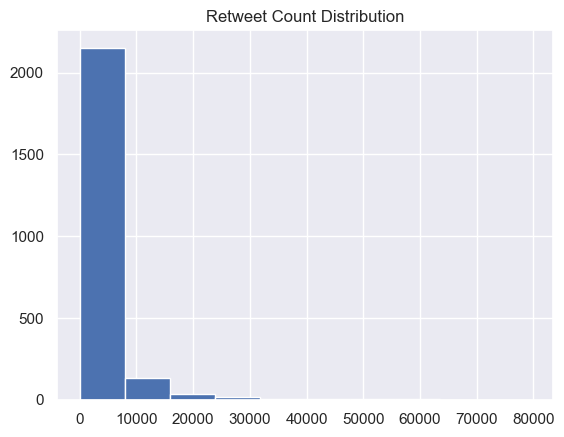

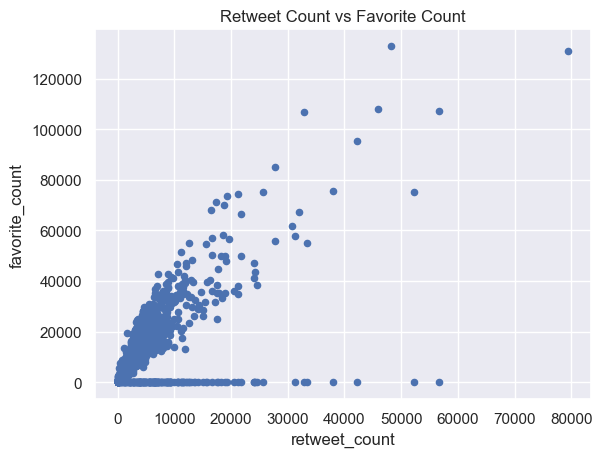

In [284]:
# Data visualization
sns.set()
df['retweet_count'].hist()
plt.title('Retweet Count Distribution')
plt.show()

df.plot.scatter(x='retweet_count', y='favorite_count')
plt.title('Retweet Count vs Favorite Count')
plt.show()

### Missing value analysis

In [287]:
print(df.isnull().sum())
print(df.info())

tweet_id                         2354
timestamp                        4429
source                           2075
text                             4429
expanded_urls                    4488
rating_numerator                 4429
rating_denominator               4429
name                             4429
dog_stage                        4429
jpg_url                          4710
img_num                          4710
p1                               4710
p1_conf                          4710
p1_dog                           4710
p2                               4710
p2_conf                          4710
p2_dog                           4710
p3                               4710
p3_conf                          4710
p3_dog                           4710
created_at                       4431
id                               4431
id_str                           4431
full_text                        4431
truncated                        4431
display_text_range               4431
entities    

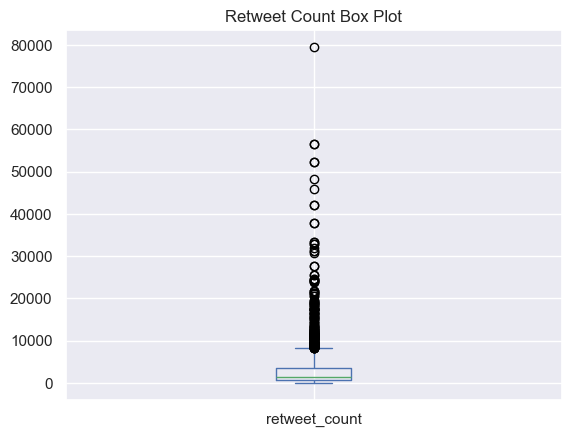

In [289]:
# Outlier detection
df['retweet_count'].plot(kind='box')
plt.title('Retweet Count Box Plot')
plt.show()

### Insights:
1.Skewed distribution: The distribution is highly skewed to the right

2.Most tweets have less than 10,000 retweets

3.High confidence in positive predictions

4.Low confidence in negative predictions

5.A significant portion of tweets have a high retweet count

### Visualization

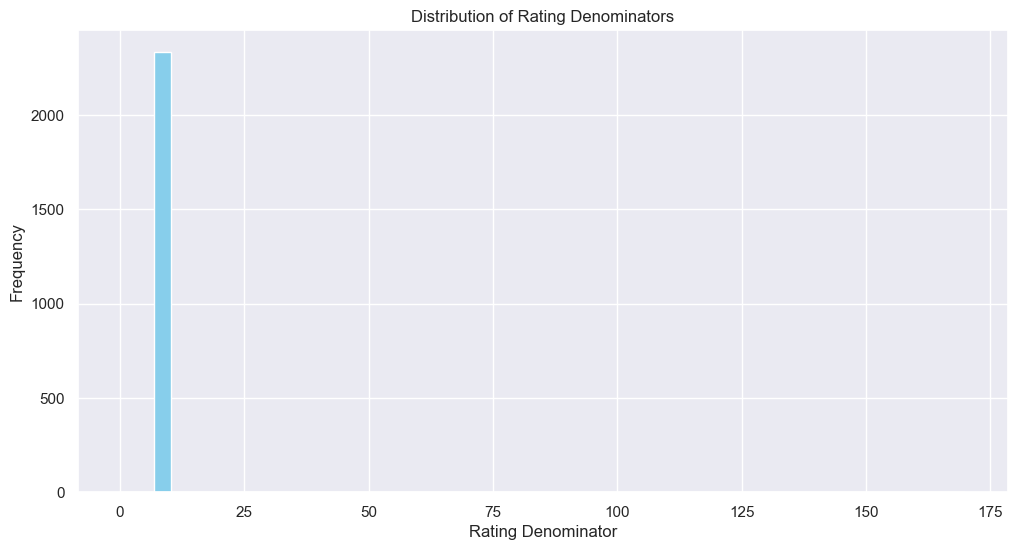

In [307]:
plt.figure(figsize=(12, 6))
plt.hist(df['rating_denominator'], bins=50, color='skyblue')
plt.xlabel('Rating Denominator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Denominators')
plt.show()

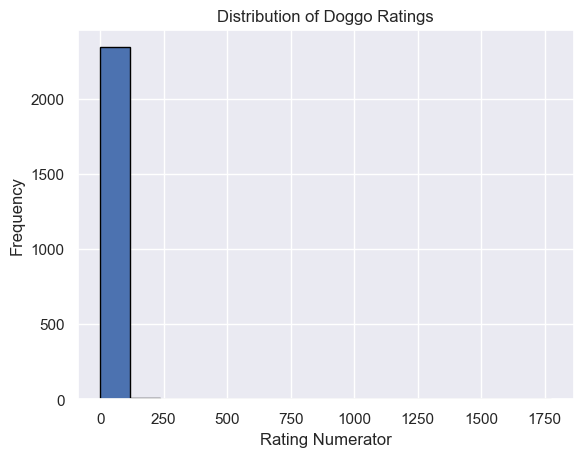

In [654]:
plt.hist(df['rating_numerator'], bins=15, edgecolor='black')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Doggo Ratings')
plt.show()

### Visualisation:
- the majority of dogs in the dataset have a rating numerator between 10 and 15. There are a significant number of dogs with a rating numerator of 12 and 13.
- a smaller number of dogs with rating numerators below 10 and above 15.
- the majority of dogs in the dataset are rated as good dogs, but there is some variation in ratings.